## Encoder and Decoder using Autoencoder

In [1]:
import os
PATH = os.getcwd()

In [2]:
os.chdir(PATH)

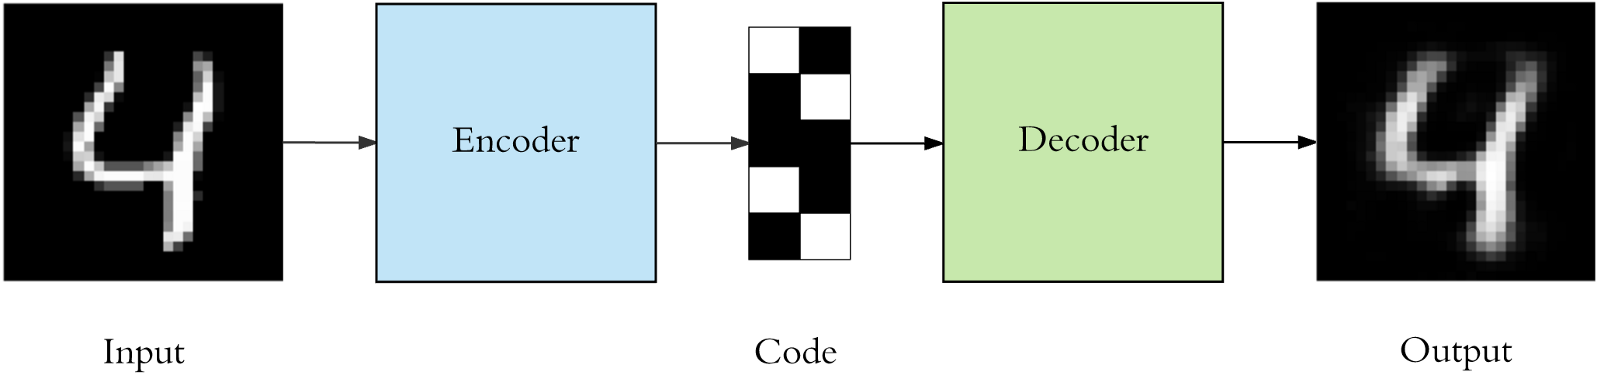

In [3]:
from IPython.display import Image
Image(filename='encodeco.png')

Data Set: MNIST

    Note: Discard the labels

In [4]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 8s 1us/step


Normalize all values between 0 and 1

In [5]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [6]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Flatten the 28x28 images into vectors of size 784.


In [7]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


#### Fully-connected neural layer as encoder and as decoder:

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

In [9]:
# The size of encoded and actual representations
encoding_dim = 32 
actual_dim = x_train.shape[1] #784

In [10]:
# Input placeholder
input_img = Input(shape=(actual_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(actual_dim, activation='sigmoid')(encoded)

In [11]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [12]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


Create a separate encoder model:

In [13]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [14]:
print(encoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


Create a separate decoder model

In [15]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](encoded_input)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [16]:
print(decoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


Configure the model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

In [17]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train our autoencoder for 50 epochs:

In [18]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.3561 - val_loss: 0.2703
Epoch 2/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2627 - val_loss: 0.2515
Epoch 3/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.2407 - val_loss: 0.2281
Epoch 4/50
60000/60000 [==============================] - 4s 58us/step - loss: 0.2201 - val_loss: 0.2101
Epoch 5/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2050 - val_loss: 0.1977
Epoch 6/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1943 - val_loss: 0.1886
Epoch 7/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1864 - val_loss: 0.1816
Epoch 8/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1799 - val_loss: 0.1756
Epoch 9/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1743 - val_loss: 0.1703
Epoc

Visualize the reconstructed inputs and the encoded representations using Matplotlib.

In [19]:
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

In [20]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<Figure size 2000x400 with 20 Axes>

Ref:

    https://blog.keras.io/building-autoencoders-in-keras.html